<a href="https://www.kaggle.com/code/avtnshm/porto-seguro-s-safe-driver-insurance-claim-pred?scriptVersionId=169339170" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.simplefilter('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/porto-seguro-safe-driver-prediction/sample_submission.csv
/kaggle/input/porto-seguro-safe-driver-prediction/train.csv
/kaggle/input/porto-seguro-safe-driver-prediction/test.csv


### Loading the dataset and checking first 5 cols

In [2]:
df = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/train.csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


### Checking the Null Values

In [3]:
for col in df.columns: print(f'{col} has  {df[col].isna().mean() * 100:2f}% null values')

id has  0.000000% null values
target has  0.000000% null values
ps_ind_01 has  0.000000% null values
ps_ind_02_cat has  0.000000% null values
ps_ind_03 has  0.000000% null values
ps_ind_04_cat has  0.000000% null values
ps_ind_05_cat has  0.000000% null values
ps_ind_06_bin has  0.000000% null values
ps_ind_07_bin has  0.000000% null values
ps_ind_08_bin has  0.000000% null values
ps_ind_09_bin has  0.000000% null values
ps_ind_10_bin has  0.000000% null values
ps_ind_11_bin has  0.000000% null values
ps_ind_12_bin has  0.000000% null values
ps_ind_13_bin has  0.000000% null values
ps_ind_14 has  0.000000% null values
ps_ind_15 has  0.000000% null values
ps_ind_16_bin has  0.000000% null values
ps_ind_17_bin has  0.000000% null values
ps_ind_18_bin has  0.000000% null values
ps_reg_01 has  0.000000% null values
ps_reg_02 has  0.000000% null values
ps_reg_03 has  0.000000% null values
ps_car_01_cat has  0.000000% null values
ps_car_02_cat has  0.000000% null values
ps_car_03_cat has  0.

### Checking the Categorical Columna

In [4]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']; categorical_cols, len(categorical_cols)

([], 0)

### Distribution Visualization


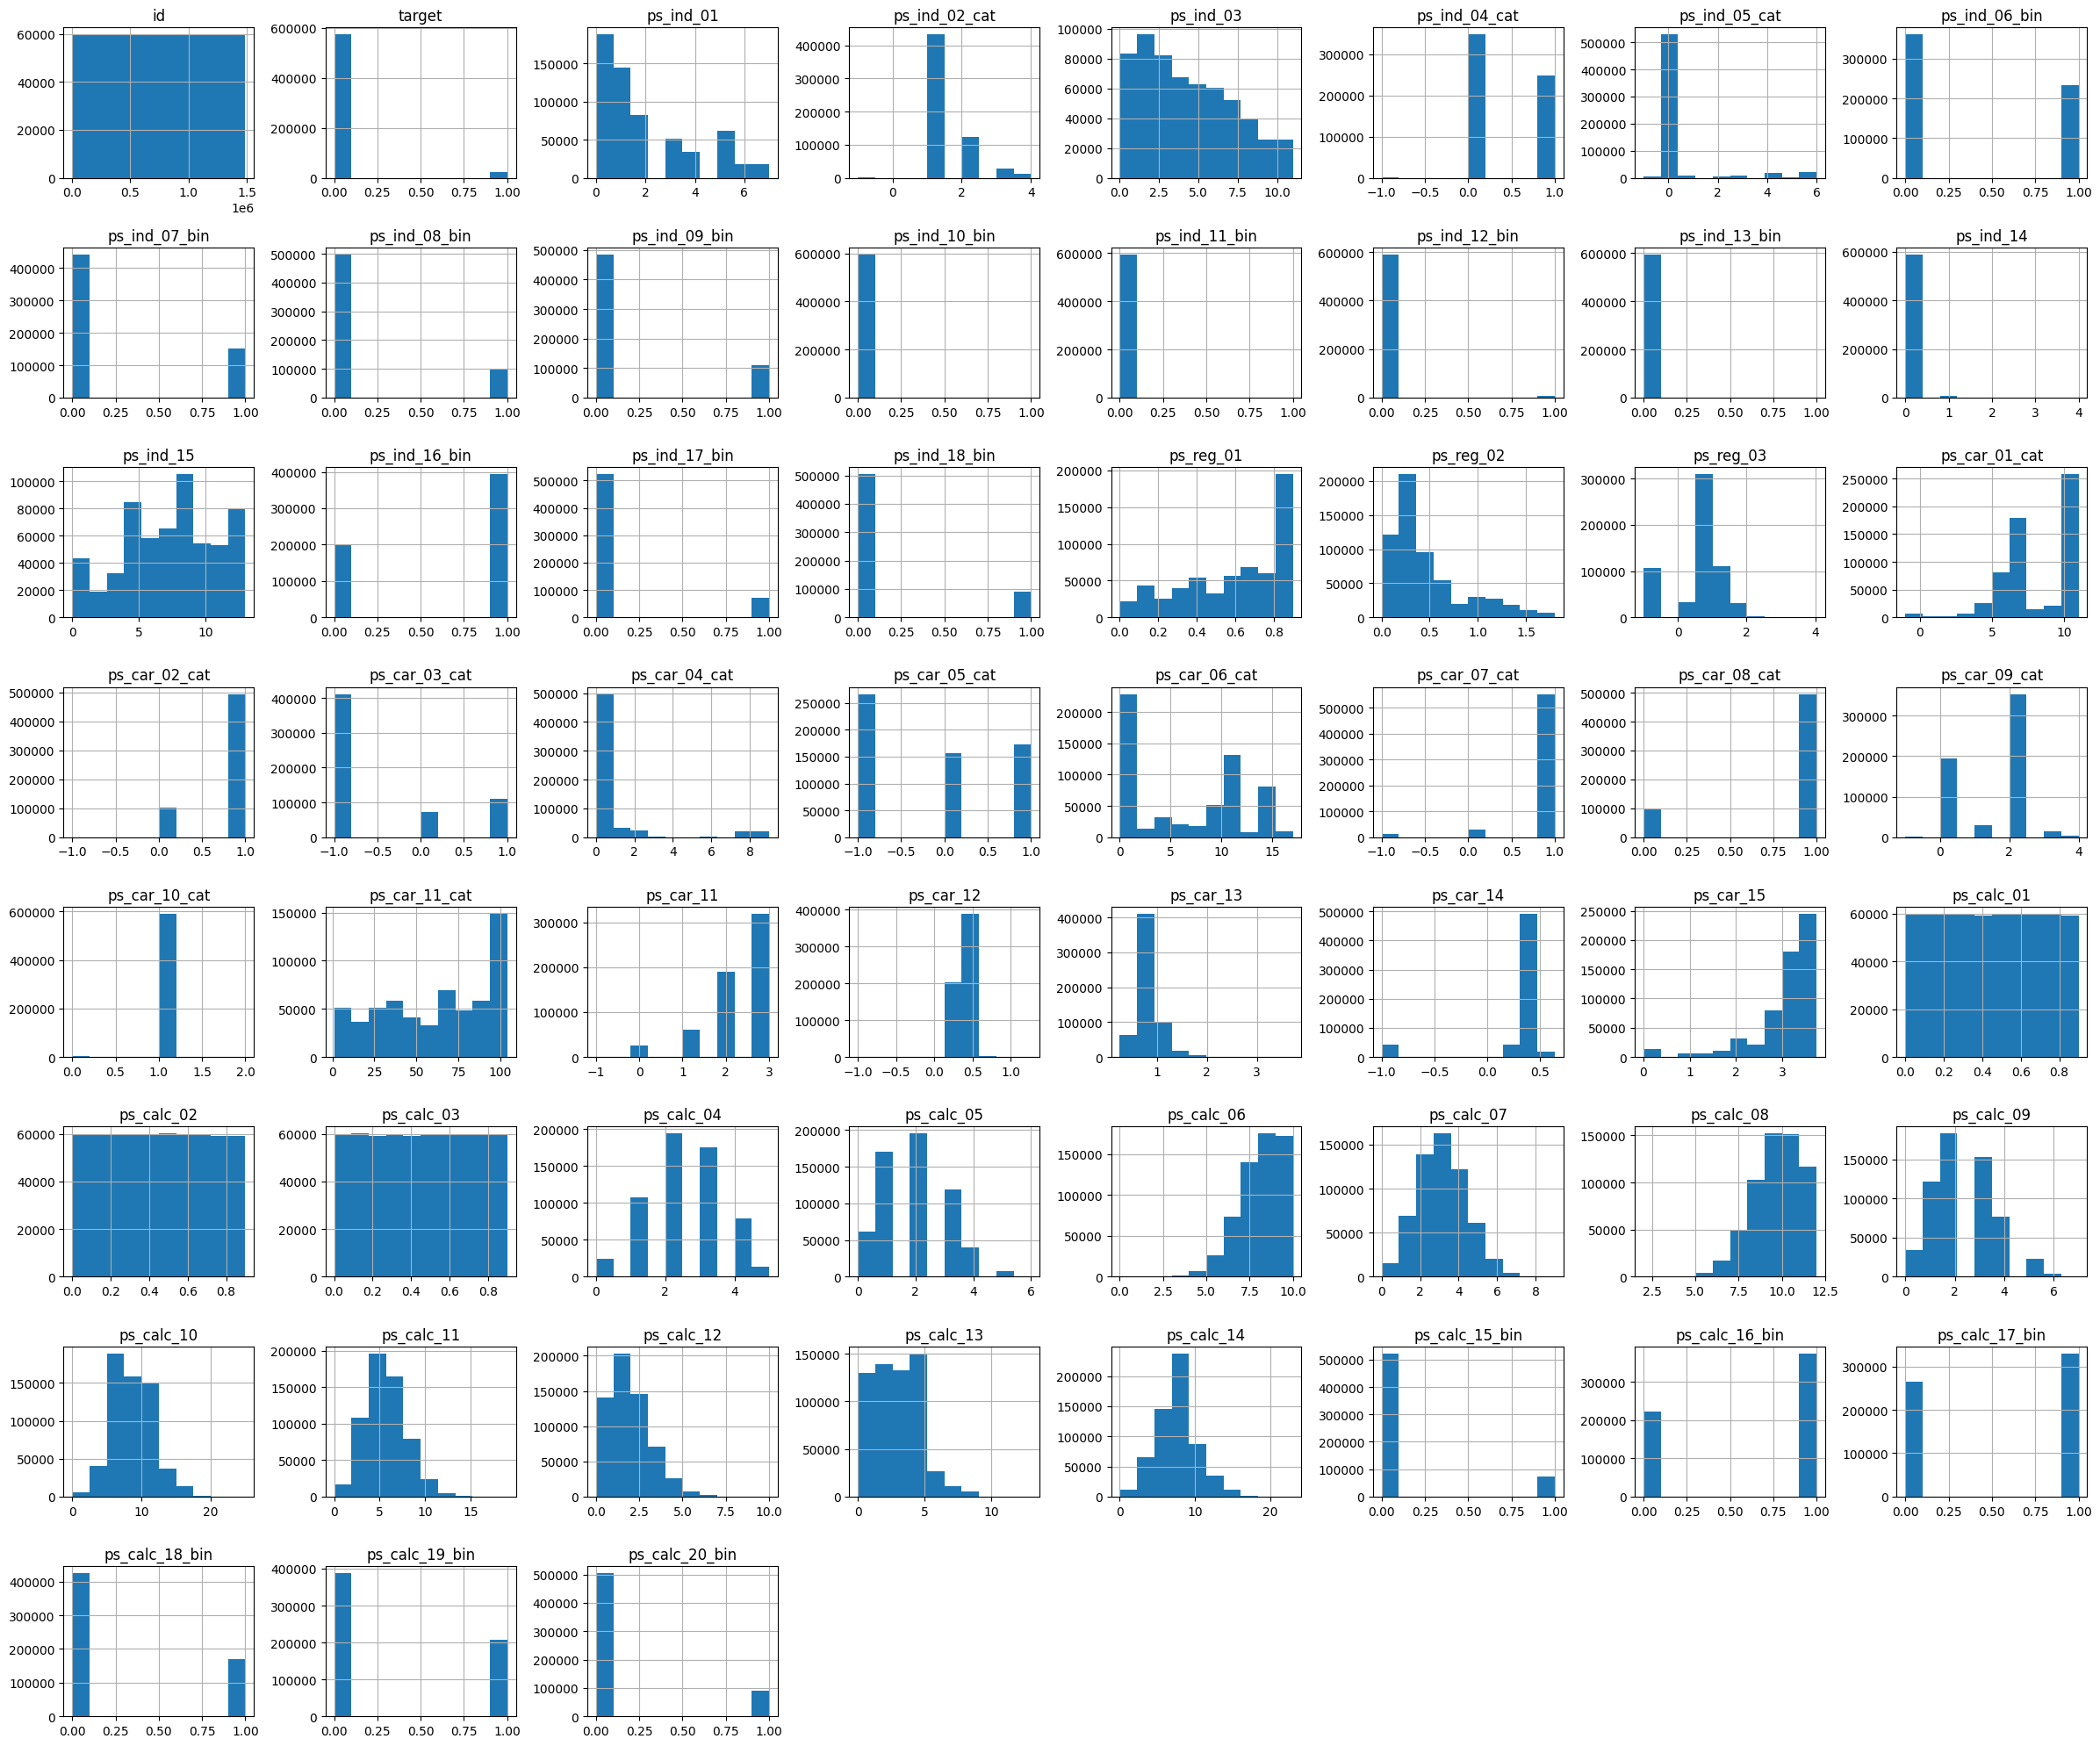

In [5]:
import matplotlib.pyplot as plt
df.hist(figsize=(24, 20))
plt.tight_layout()
plt.show()

### Target Value Counts

In [6]:
df['target'].value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

### Resampling using SMOTE

In [13]:
from imblearn.over_sampling import SMOTE
X = df.drop('target', axis=1)
y = df['target']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class Distribution after SMOTE:")
print(y_resampled.value_counts())

Class Distribution after SMOTE:
target
0    573518
1    573518
Name: count, dtype: int64


### Splitting the Data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=4)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (917628, 58)
Shape of X_test: (229408, 58)
Shape of y_train: (917628,)
Shape of y_test: (229408,)


### Random Number Search

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

Train = []
Test = []
CV = []

for i in range(0, 10): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LogisticRegression() 
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    Train.append(model.score(X_train, y_train))
    Test.append(model.score(X_test, y_test))
    
    CV.append(cross_val_score(model, X, y, cv=5).mean())

metrics_df = pd.DataFrame({"Train": Train, "Test": Test, "CV": CV})
filtered_df = metrics_df[(abs(metrics_df['Train'] - metrics_df['Test']) <= 0.05) &
                         (abs(metrics_df['Test'] - metrics_df['CV']) <= 0.05)]

best_random_state = filtered_df[filtered_df["Test"] == filtered_df["Test"].max()].index.to_list()[0]
print("Best random_state number:", best_random_state)

Best random_state number: 4


In [15]:
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression(random_state=4)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.528403543032501
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.44      0.48    114723
           1       0.52      0.62      0.57    114685

    accuracy                           0.53    229408
   macro avg       0.53      0.53      0.52    229408
weighted avg       0.53      0.53      0.52    229408



In [16]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=4)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Model Accuracy:", accuracy_xgb)

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model Accuracy: 0.9805499372297392
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114723
           1       1.00      0.96      0.98    114685

    accuracy                           0.98    229408
   macro avg       0.98      0.98      0.98    229408
weighted avg       0.98      0.98      0.98    229408

